# EDA Case study analysis

In [397]:
#First we load and inspect the data with respect to applicaion before that importing all required librariries
#import the warnings.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [398]:
appl_data=pd.read_csv('application_data.csv')
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Inspecting the data and its dimension

In [399]:
appl_data.ndim

2

In [400]:
print("There are {} rows and {} columns in the data set".format(appl_data.shape[0],appl_data.shape[1]))

There are 307511 rows and 122 columns in the data set


# Analysing the data types across each column

In [401]:
appl_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [402]:
appl_data.columns[appl_data.dtypes=='float64']

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [403]:
##Let us use the list to segregate the columns based on the datatypes
integer_list=appl_data.columns[appl_data.dtypes=='int64']
float_list=appl_data.columns[appl_data.dtypes=='float64']
object_list=appl_data.columns[appl_data.dtypes=='object']
    


# Inspecting the % of missing values across all columns

We shall remve all the columns having 40% of missing values and retain others by imputation as
imputing them might make the data analysis biased

In [404]:

appl_data=appl_data.copy()
print("Original column size",appl_data.shape[1])
new_column_size=appl_data.loc[:,appl_data.isnull().mean()*100>=40]
appl_data.drop(columns=new_column_size,inplace=True)
print("New column size",appl_data.shape[1])

Original column size 122
New column size 73


In [405]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
#Taking all the columns which is having null values greater than 0

appl_data.loc[:,appl_data.isnull().mean()>0]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27517.5,454500.0,"Spouse, partner",Laborers,2.0,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,41301.0,1395000.0,Unaccompanied,Accountants,3.0,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,42075.0,1530000.0,Unaccompanied,Managers,2.0,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,33826.5,913500.0,Children,NaN,2.0,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,20250.0,405000.0,Unaccompanied,Laborers,1.0,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


There are totally 18 columns out of which we shall target only the required columns for imputation

Colums of interests: 

1. AMT_ANNUITY
2. AMT_GOODS_PRICE
3. NAME_TYPE_SUITE
4. OCCUPATION_TYPE
5. CNT_FAM_MEMBERS
6. AMT_REQ_CREDIT_BUREAU_HOUR
7. AMT_REQ_CREDIT_BUREAU_DAY
8. AMT_REQ_CREDIT_BUREAU_WEEK
9. AMT_REQ_CREDIT_BUREAU_MON
10. AMT_REQ_CREDIT_BUREAU_QRT
12. AMT_REQ_CREDIT_BUREAU_YEAR






In [407]:
appl_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [408]:
appl_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [409]:
##Observing the 99th percentile data in both AMT_ANNUITY and AMT_GOODS_PRICE
print('99th percentile of AMT_ANNUITY columns is :',np.nanpercentile(appl_data.AMT_ANNUITY,99))
print('99th percentile of AMT_GOODS_PRICE columns is :',np.nanpercentile(appl_data.AMT_GOODS_PRICE,99))

99th percentile of AMT_ANNUITY columns is : 70006.5
99th percentile of AMT_GOODS_PRICE columns is : 1800000.0


We shall focus the numeric columns on Annuity and AMT_Goods if outlier is present we shall impute by
median


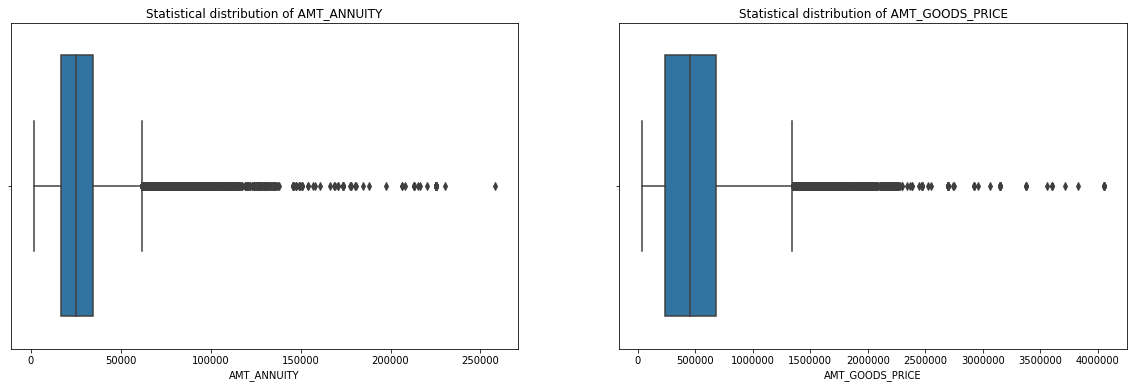

In [410]:
##Plotting box plots for AMT_ANNUITY and AMT_GOODS_PRICE
plt.figure(figsize=[20,6])
ax1=plt.subplot(1,2,1)
sns.boxplot(appl_data.AMT_ANNUITY)
plt.title('Statistical distribution of AMT_ANNUITY')
ax2=plt.subplot(1,2,2)
sns.boxplot(appl_data.AMT_GOODS_PRICE)
plt.title('Statistical distribution of AMT_GOODS_PRICE')
plt.show()

From the above plots we could infer the following:
    1. The median or 50% of data has the loan annuity less than 25000 and that of the loan offered 
       for the goods is less than 450000 by 50% in the total population
    2. There are outliers in the both loan annuity and AMT_GOODS_PRICE this is possibly may be high class business people
       might have availed this bulk loan however based on our previous 99 percentile calculation these account only for less
       than 1% of total data.
    3. Since we have outlier here , we shall impute the columns based on median.

Targeting other numercial columns and its imputation

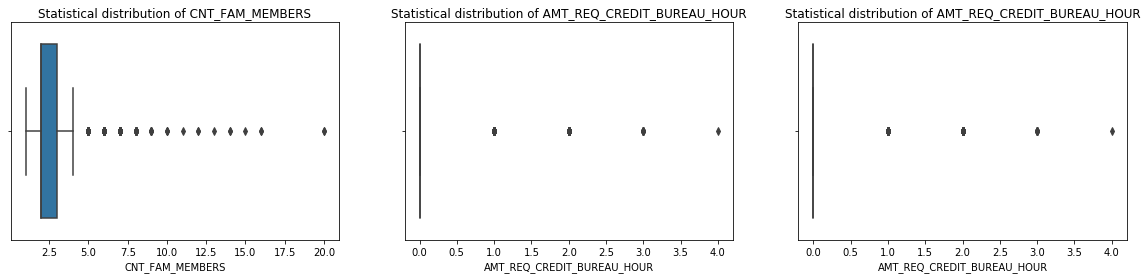

In [411]:
plt.figure(figsize=[20,4])
ax1=plt.subplot(1,3,1)
sns.boxplot(appl_data.CNT_FAM_MEMBERS)
plt.title('Statistical distribution of CNT_FAM_MEMBERS')
ax2=plt.subplot(1,3,2)
sns.boxplot(appl_data.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.title('Statistical distribution of AMT_REQ_CREDIT_BUREAU_HOUR')
ax2=plt.subplot(1,3,3)
sns.boxplot(appl_data.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.title('Statistical distribution of AMT_REQ_CREDIT_BUREAU_HOUR')
plt.show()

Based on previous box plot it is clear that the AMT REQ fields all are centred around 0 and for the family count of the
client , the median value is mostly 2.5 , so we can use value_counts and impute the maximum value here

In [412]:
appl_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

0.0

In [413]:
appl_data['CNT_FAM_MEMBERS'].fillna(appl_data.CNT_FAM_MEMBERS .mode()[0],inplace=True)

In [414]:
appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_HOUR .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_DAY .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_WEEK .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_MON .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_QRT .mode()[0],inplace=True)
appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appl_data.AMT_REQ_CREDIT_BUREAU_YEAR .mode()[0],inplace=True)


In [415]:
##Imputing the missing values of AMT_ANNUITY and AMT_GOODS_PRICE based on median

appl_data['AMT_ANNUITY'].fillna(appl_data['AMT_ANNUITY'].median(),inplace=True)
appl_data['AMT_GOODS_PRICE'].fillna(appl_data['AMT_GOODS_PRICE'].median(),inplace=True)

In [416]:
print('Total number of null columns in AMT_ANNUITY',appl_data['AMT_ANNUITY'].isnull().sum())
print('Total number of null columns in AMT_ANNUITY',appl_data['AMT_GOODS_PRICE'].isnull().sum())

Total number of null columns in AMT_ANNUITY 0
Total number of null columns in AMT_ANNUITY 0


Analysing the categorical column and impute based on mode

In [417]:
print('Mode of NAME_TYPE_SUITE column is',appl_data.NAME_TYPE_SUITE .mode()[0])
print('Mode of OCCUPATION_TYPE column is',appl_data.OCCUPATION_TYPE .mode()[0])

Mode of NAME_TYPE_SUITE column is Unaccompanied
Mode of OCCUPATION_TYPE column is Laborers


In [418]:
##Imputing the mode values in those two categorical columns

appl_data['NAME_TYPE_SUITE'].fillna(appl_data.NAME_TYPE_SUITE .mode()[0],inplace=True)
appl_data['OCCUPATION_TYPE'].fillna(appl_data.OCCUPATION_TYPE .mode()[0],inplace=True)

In [419]:
##Again checking the null count

appl_data.loc[:,appl_data.isnull().mean()>0].shape[1]

7

We shall neglect those columns as we are not going to utilise them much in our analysis

# Checking the data types and validity of columns

From the excel we just had a quick glance like certain numeric columns needs to be
positiove but they are negative , we shall investigate and fix all those columns

In [420]:
##Through our initial inspection we found like we have negative values for days columsn let us inspect all days columns under float
days_list=[]
for i in float_list:
    if('days' in i.lower())==True:
        days_list.append(i)
for j in integer_list:
     if('days' in j.lower())==True:
        days_list.append(j)
print(days_list)

['DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']


In [421]:
##Locating these columns
appl_data.loc[:,days_list].head()


,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,-3648.0,-1134.0,-9461,-637,-2120
1,-1186.0,-828.0,-16765,-1188,-291
2,-4260.0,-815.0,-19046,-225,-2531
3,-9833.0,-617.0,-19005,-3039,-2437
4,-4311.0,-1106.0,-19932,-3038,-3458


As expected all these days columns must be positive so we take absolute values across these columns

In [422]:
appl_data['DAYS_REGISTRATION']=appl_data['DAYS_REGISTRATION'].abs()
appl_data['DAYS_LAST_PHONE_CHANGE']=appl_data['DAYS_LAST_PHONE_CHANGE'].abs()
appl_data['DAYS_BIRTH']=appl_data['DAYS_BIRTH'].abs()
appl_data['DAYS_EMPLOYED']=appl_data['DAYS_EMPLOYED'].abs()
appl_data['DAYS_ID_PUBLISH']=appl_data['DAYS_ID_PUBLISH'].abs()

In [423]:
##Rechecking if the changes are made:
appl_data.loc[:,days_list].head()


,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,3648.0,1134.0,9461,637,2120
1,1186.0,828.0,16765,1188,291
2,4260.0,815.0,19046,225,2531
3,9833.0,617.0,19005,3039,2437
4,4311.0,1106.0,19932,3038,3458


# We try to bin the columns based on value spread which eases further analysis

From our first point of over-view it is clear that the foloowing columns can be binned.

1.AMT_INCOME_TOTAL

2.AMT_CREDIT

3.DAYS_BIRTH


In [424]:
##Binning the income of the clients 
print('Maximum income of clients is ',appl_data.AMT_INCOME_TOTAL.describe()[-1])
print('Median income of clients is',appl_data.AMT_INCOME_TOTAL.describe()[5])
print('Minimum income of clients is ',appl_data.AMT_INCOME_TOTAL.describe()[3])

Maximum income of clients is  117000000.0
Median income of clients is 147150.0
Minimum income of clients is  25650.0


Based on the above fact we try to allocate the bins ased on q cut and we can do the following

1.Salary between 0 and 20 percentile of Income data ------> VERY_LOW
2.Salary between 20 and 50 percentile of Income data ------> LOW
3.Salary between 50 and 80 percentile of Income data ------> AVERAGE_INCOME
4.Salary between 80 and 95 percentile of Income data ------> RICH
5.Salary greater than 95 percentile of Income data ------> SUPER_RICH



In [425]:
appl_data['AMT_INCOME_TOTAL_BINS']= pd.qcut(appl_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1],
                                                                labels=['Very_low_class', 'Low_class', 'Middle_class','Upper_Middle','Rich_class'])



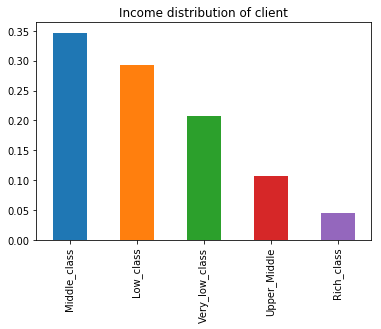

In [426]:
appl_data['AMT_INCOME_TOTAL_BINS'].value_counts(normalize=True).plot.bar()
plt.title('Income distribution of client')
plt.show()

In [427]:
##Applying same logic for credit amount for loan column

appl_data['AMT_CREDIT_BINS']= pd.qcut(appl_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1],
                                                                labels=['VERY_LOW', 'LOW', "AVERAGE", 'HIGH', 'VERY_HIGH'])



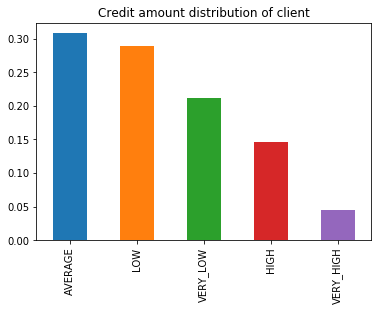

In [428]:
appl_data['AMT_CREDIT_BINS'].value_counts(normalize=True).plot.bar()
plt.title('Credit amount distribution of client')
plt.show()

Now let us target the day of birth column . Note that it is in days we conver that to year so that our analysis
becomes easier as we are able to bin the age groups

In [429]:
appl_data.DAYS_BIRTH=round(appl_data.DAYS_BIRTH/365.25,2)

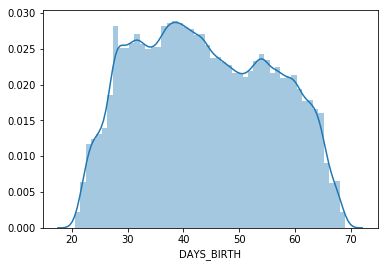

In [430]:
sns.distplot(appl_data.DAYS_BIRTH,kde=True)
plt.show()

The distribution is not like the normal and the data seems like distributed across all ages with more proportion
Let us bin the age column

In [431]:
appl_data['DAYS_BIRTH_bins']=pd.cut(appl_data.DAYS_BIRTH,[0,30,50,120]
                                    ,labels=['YOUNG_AGE','MIDDLE_AGE','SENIOR_CITIZENS'])

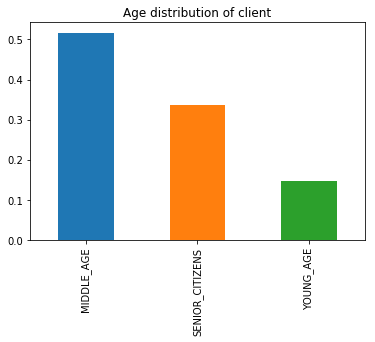

In [432]:
appl_data['DAYS_BIRTH_bins'].value_counts(normalize=True).plot.bar()
plt.title('Age distribution of client')
plt.show()

In [433]:
appl_data.DAYS_EMPLOYED=round(appl_data.DAYS_EMPLOYED/365.25,2)

In [434]:
appl_data['DAYS_EMPLOYED_BINS']= pd.qcut(appl_data.DAYS_EMPLOYED, q=[0,0.1,0.3,0.6,0.8,1],
                                                                labels=['NIL_EXP', 'LOW_EXP', 'MODERATE_EXP', 'HIGH_EXP','VERY_HIGH_EXP'])



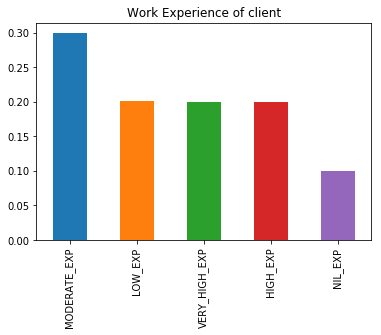

In [435]:
appl_data['DAYS_EMPLOYED_BINS'].value_counts(normalize=True).plot.bar()
plt.title('Work Experience of client')
plt.show()

We mostly are done with the the first part of EDA

1. Verified about the outliers

2. Removed the columns which contributed to maximum null values

3. Corrected the column magnitude i.,e days

4. Inspected the numerical columns and we binned those columns to suit our anaysis

Now we move on to the next step ( remember still we have previous application data file which we investigate once we 
get a picture in analysing the application file data of the clients)



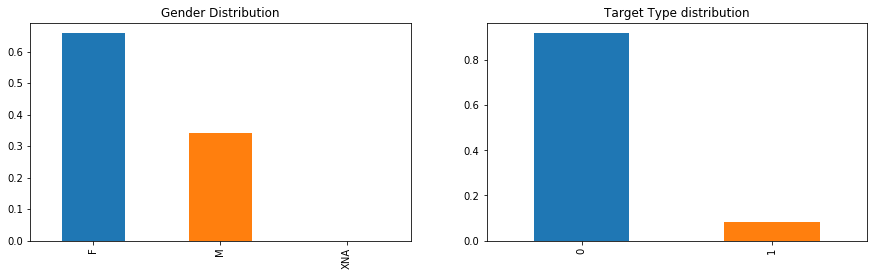

In [436]:
##TO check is there any imbalance in gender and target variable

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
appl_data["CODE_GENDER"].value_counts(normalize=True).plot.bar()
plt.title('Gender Distribution')
ax2=plt.subplot(1,2,2)
appl_data.TARGET.value_counts(normalize=True).plot.bar()
plt.title('Target Type distribution')
plt.show()



The above graph clearly indicates that there is an imbalance between male and female

# UNIVARIATE ANALYSIS

Possible analysis can be done:

We need to analyse how each of the columns ( most important columns ) do contribute towards the target variable.

We have 1 - for the population who has difficulty in re-paying the loan or the one who is most likely to default.
        0 - for the population who pays the loan or the case of non-default
        
So we shall first segregate our analysis on the basis of target variable so that we have two classes 0 and 1 and for each of the classes we shal perform the analysis and inferences

In [437]:
defaulters=appl_data.loc[appl_data.TARGET==1]
non_defaulters=appl_data.loc[appl_data.TARGET==0]

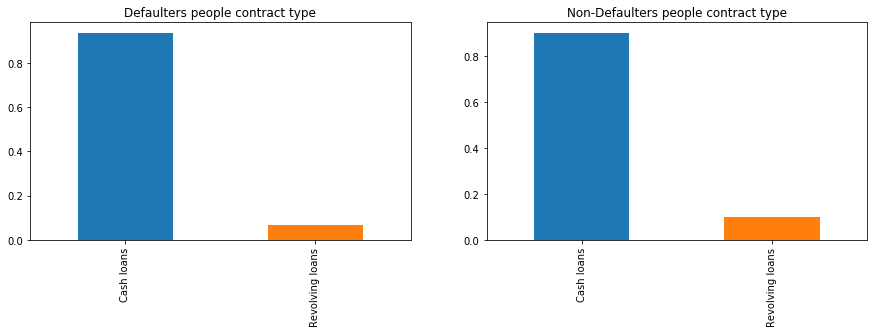

In [438]:
##Understanding the loan contract type
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Defaulters people contract type')
ax2=plt.subplot(1,2,2)
non_defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Non-Defaulters people contract type')
plt.show()



There is no much evidance here as the proportion of both cash and revolving loans are almost same in both defaul and non-default case

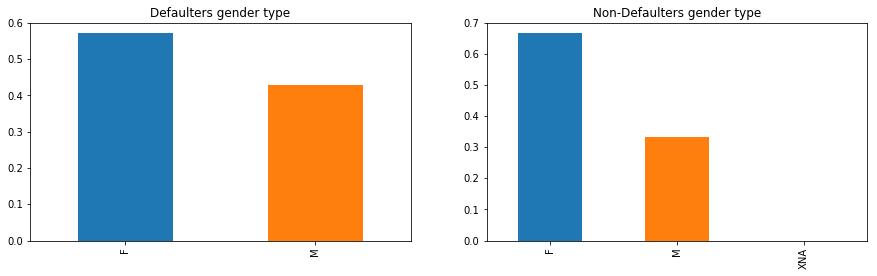

In [439]:
## Understanding how the gender has an effect over these classes

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title('Defaulters gender type')
ax2=plt.subplot(1,2,2)
non_defaulters.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title('Non-Defaulters gender type')
plt.show()



We can neglect the XNA here , as we have seen previously there is a 70-30 split between Female and Male population.So based on the above graph we can infer that the females are comparitvely greater in proportion in applying loans when compred to males so is the default and non-default rate .Quick insight we can get from here is for the given proportion males tends to default more than the females



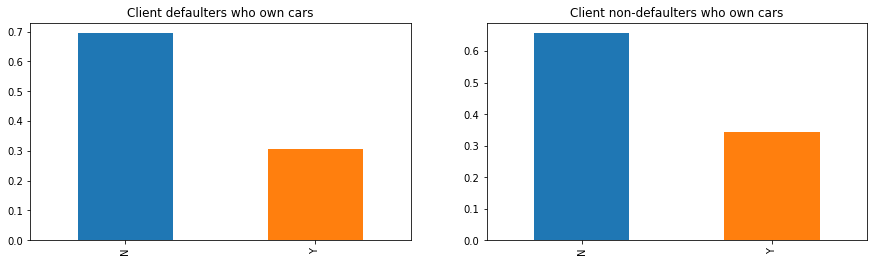

In [440]:
## Understanding how the car has an effect over these classes

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.title('Client defaulters who own cars')
ax2=plt.subplot(1,2,2)
non_defaulters.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.title('Client non-defaulters who own cars')
plt.show()



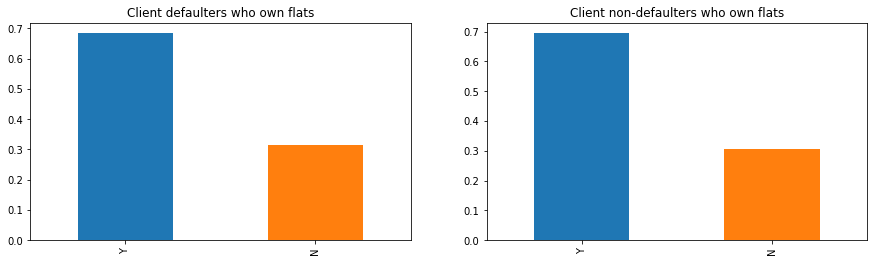

In [441]:
## Understanding how the flat has an effect over these classes

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.title('Client defaulters who own flats')
ax2=plt.subplot(1,2,2)
non_defaulters.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.title('Client non-defaulters who own flats')
plt.show()

We infer that the people who own the flats are in higher propertion of defaulting the loan when compared to others who don't have their own flats . However based on whether the client having own car does not contribute more towards loan default .This could be because 

1. Even normal flats are more expensive than accomodating the cars hence eventhough the clients who have own cars mostly repaid
   the loan whereas this is not the case for those who possess own flats
   
2. So we need to find whether the client is having own car and own house if that is the case we need to be slight attentive

In [442]:
#appl_data.loc[:,['CNT_FAM_MEMBERS','CNT_CHILDREN']]

#We add children count and family count together to have total family count

defaulters['Total_Family_Count']=defaulters['CNT_FAM_MEMBERS'].astype('int64')+defaulters['CNT_CHILDREN']
non_defaulters['Total_Family_Count']=non_defaulters['CNT_FAM_MEMBERS'].astype('int64')+non_defaulters['CNT_CHILDREN']

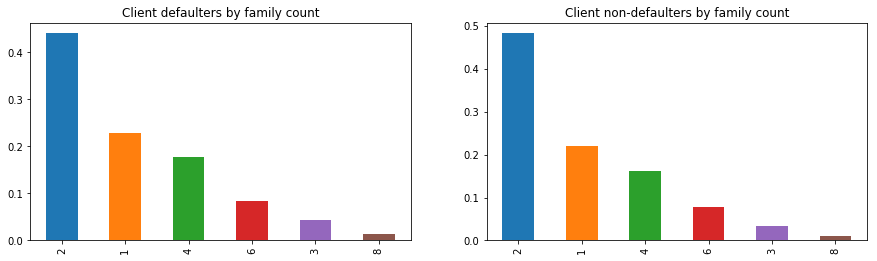

In [443]:

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters['Total_Family_Count'].value_counts(normalize=True).sort_values(ascending=False).iloc[:6].plot.bar()
plt.title('Client defaulters by family count')
ax2=plt.subplot(1,2,2)
non_defaulters.Total_Family_Count.value_counts(normalize=True).sort_values(ascending=False).iloc[:6].plot.bar()
plt.title('Client non-defaulters by family count')
plt.show()


We observe no major change here as we could see the proportion of 2 member family who defaults is less than those who does not default . So based on the left side of graph of defaulters , we can't conclude that the 2-member family defaults more.

Categorical Unordered analysis

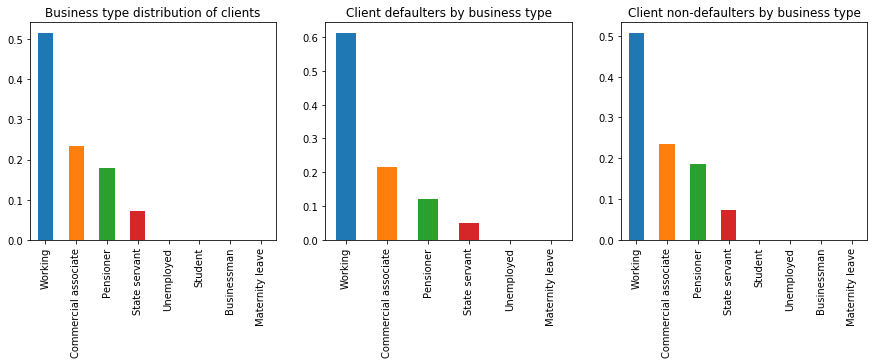

In [444]:
#Business types of clients 

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['NAME_INCOME_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Business type distribution of clients')
ax2=plt.subplot(1,3,2)
defaulters['NAME_INCOME_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters by business type')
ax3=plt.subplot(1,3,3)
non_defaulters.NAME_INCOME_TYPE.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters by business type')
plt.show()


Some interesting inferences can be made:

1. It is evident that the students might not have any commitments so they re-pay the loan on time , hence there is no default    case seen for them.
2. Business people never defaults.
3. More loans are distributed/targeted to the working classes ( nearly 51%)
4. However when compared to the defaulters percentage of working people which is nearly 60% and those of the non-default percentage of working people is 50% . In this case we need additional caution or checks needed when we target the working people



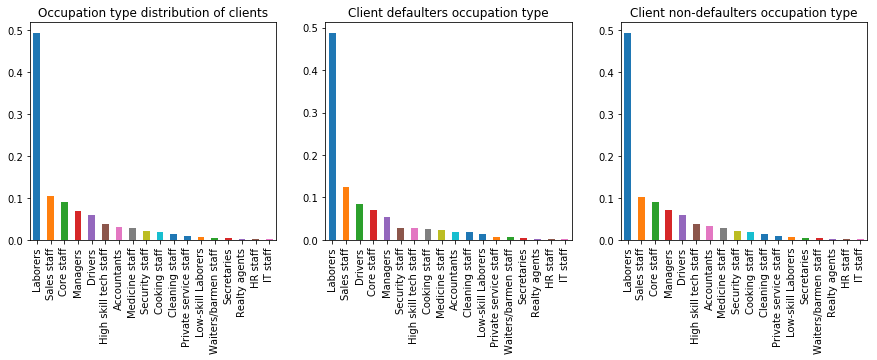

In [445]:
##Occupation type of clients

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['OCCUPATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Occupation type distribution of clients')
ax2=plt.subplot(1,3,2)
defaulters['OCCUPATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters occupation type')
ax3=plt.subplot(1,3,3)
non_defaulters.OCCUPATION_TYPE.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters occupation type')
plt.show()


There is no clear insight as the proportion of default and non-default is the same across occupation type

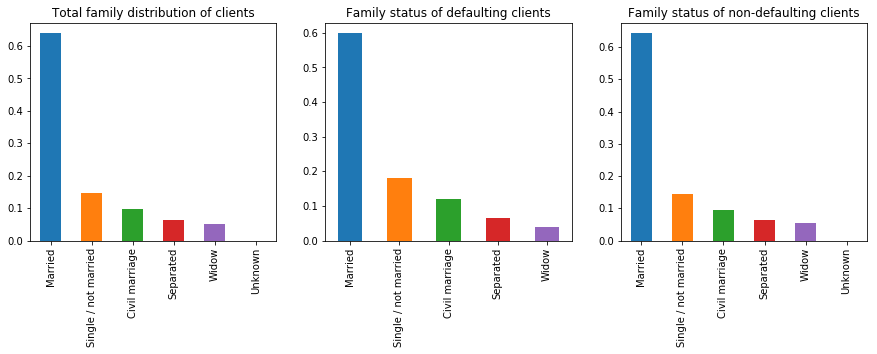

In [446]:
#Family status of  clients

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['NAME_FAMILY_STATUS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Total family distribution of clients')
ax2=plt.subplot(1,3,2)
defaulters['NAME_FAMILY_STATUS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Family status of defaulting clients')
ax2=plt.subplot(1,3,3)
non_defaulters.NAME_FAMILY_STATUS.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Family status of non-defaulting clients')
plt.show()


Based on the above plot , we infer the following:

1. Based on the proportion size , married people tend to fall on slightly at the non-default side and same for widow.
2. On the other hand for the given proportion 'civil married' people and 'single not married' tend to default

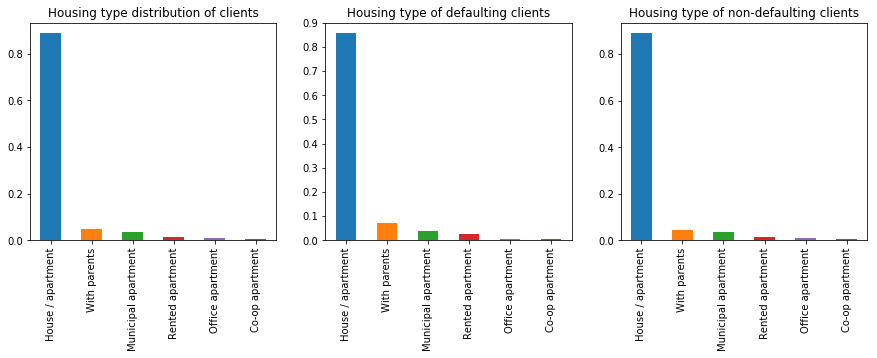

In [447]:
#Housing type of clients

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['NAME_HOUSING_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()    
plt.title('Housing type distribution of clients')
ax2=plt.subplot(1,3,2)
defaulters['NAME_HOUSING_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Housing type of defaulting clients')
ax2=plt.subplot(1,3,3)
non_defaulters.NAME_HOUSING_TYPE.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Housing type of non-defaulting clients')
plt.show()


Some inferences can be

1. Most of the loans are concentrated towards the people who live in appartments type and the defaulting case is more however the non-default case is also equally dominating

2. People who live with parents tend to default less ( may be the data is less distributed across this feature )

3. We can not come to a strong conclusion just by looking at this

Ordered Categorical Analysis

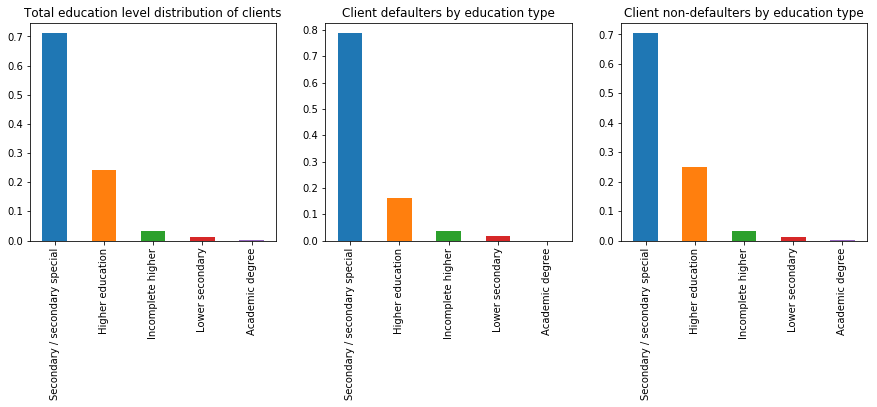

In [448]:
#Level of education of clients

plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Total education level distribution of clients')
ax2=plt.subplot(1,3,2)
defaulters['NAME_EDUCATION_TYPE'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters by education type')
ax3=plt.subplot(1,3,3)
non_defaulters.NAME_EDUCATION_TYPE.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters by education type')
plt.show()


Some inferences based on above evidance are as follows.

1. People who deafult contribute to 79% whereas those who do not default is roughly 69% . So in the given proportion people who
   completed their secondary education is likely to default more

2. When compared to people who posses higher degree are likely to be non-defaulters as there is a increase in non-defaulters with
   Higher education when compared to the defaulters.

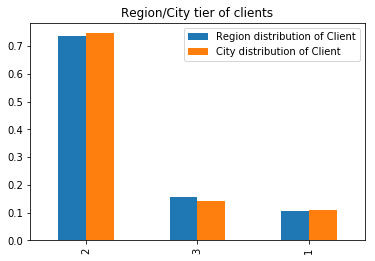

In [449]:
#Total Region/City distribution of clients

x=appl_data['REGION_RATING_CLIENT'].value_counts(normalize=True).sort_values(ascending=False)
y=appl_data['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True).sort_values(ascending=False)
df1=pd.DataFrame({'Region distribution of Client':x,'City distribution of Client':y})
df1.plot.bar()
plt.title('Region/City tier of clients')
plt.show()


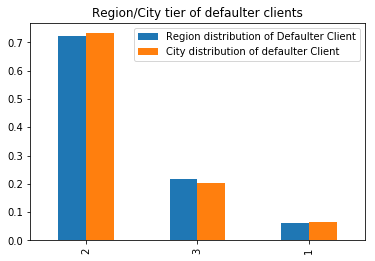

In [450]:
#City/region of defaulters

x=defaulters['REGION_RATING_CLIENT'].value_counts(normalize=True).sort_values(ascending=False)
y=defaulters['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True).sort_values(ascending=False)
df1=pd.DataFrame({'Region distribution of Defaulter Client':x,'City distribution of defaulter Client':y})
df1.plot.bar()
plt.title('Region/City tier of defaulter clients')
plt.show()


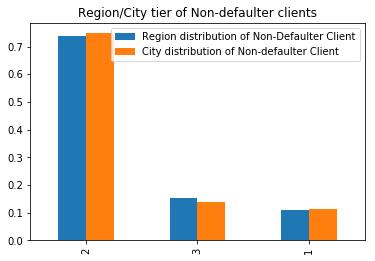

In [451]:
#City/region of non-defaulters
x=non_defaulters['REGION_RATING_CLIENT'].value_counts(normalize=True).sort_values(ascending=False)
y=non_defaulters['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True).sort_values(ascending=False)
df1=pd.DataFrame({'Region distribution of Non-Defaulter Client':x,'City distribution of Non-defaulter Client':y})
df1.plot.bar()
plt.title('Region/City tier of Non-defaulter clients')
plt.show()

So some observations could be

1. Loans are targeted/given to people who come from tier-2 city/region and also their default case is higher.

2. We can also see that in tier-3 the proportion of people who default is slighlty higher than the people who do not default ( for non-default it is roughly 10% and default it is roughly 18% for tier-3 )

3. For the people from tier-1 the proportion of people who not default is roughly 10% those that of 0.05% who defaults . So people from tier-1 according to the data it seems like they default less

Unordered categorical analysis

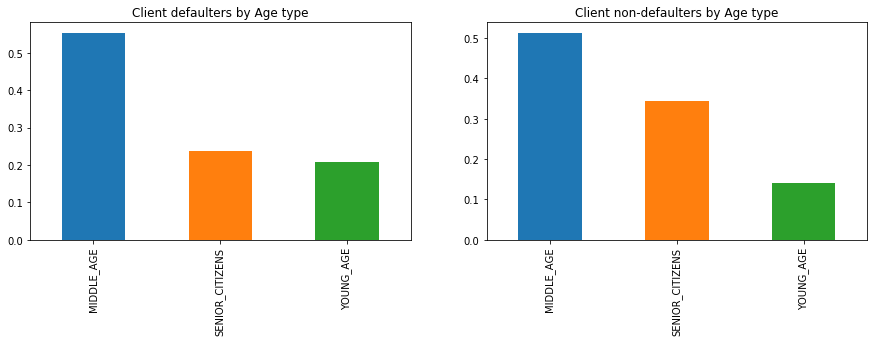

In [452]:
#Understanding the age factor vs default
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters['DAYS_BIRTH_bins'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters by Age type')
ax2=plt.subplot(1,2,2)
non_defaulters.DAYS_BIRTH_bins.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters by Age type')
plt.show()


Based on the above information we could conclude that 

1. Middle age people have almost equla propertion of default vs non-default so we can not conclude much on this class of people

2. It seems that from the given proportion sineor citizens tend to default less

3. Young age people are likely to default more as it is evident from the defalt-non_default plots

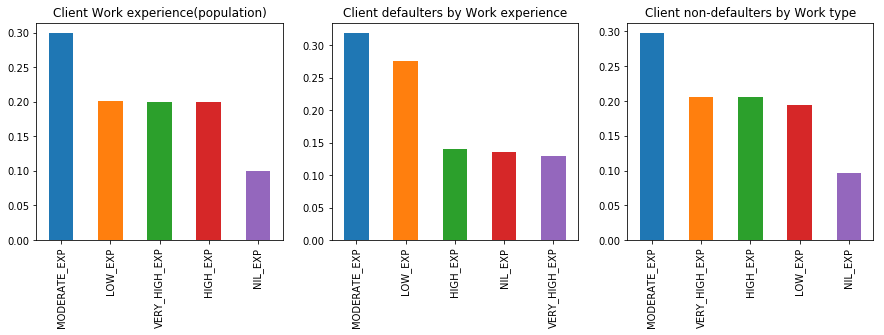

In [453]:
#Work experience vs defaulters
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['DAYS_EMPLOYED_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client Work experience(population)')
ax2=plt.subplot(1,3,2)
defaulters['DAYS_EMPLOYED_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters by Work experience')
ax3=plt.subplot(1,3,3)
non_defaulters.DAYS_EMPLOYED_BINS.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters by Work type')
plt.show()

Some interesting conclusions can be drawn here:
   
1. If we observe the overall population, we infer that people with nil and low experience tend to default more than 
   others also these proportions are higher than the non-defaulters propertion in the same category.
        
2. As experience becomes more the default case reduces this is evident because they might be earning well .

Understdanding how annual income and total credit have effect on defaulters

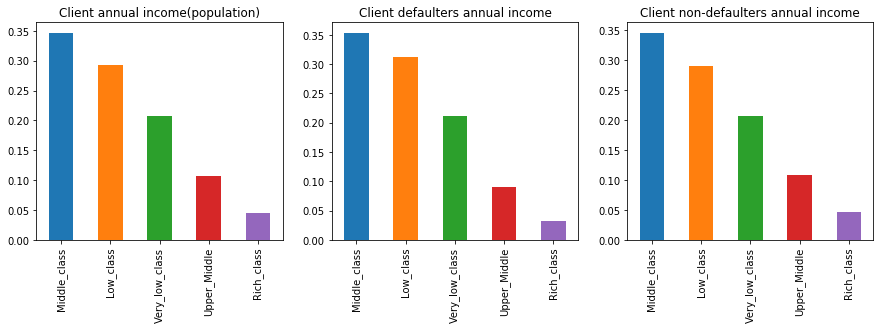

In [454]:
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['AMT_INCOME_TOTAL_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client annual income(population)')
ax2=plt.subplot(1,3,2)
defaulters['AMT_INCOME_TOTAL_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters annual income')
ax3=plt.subplot(1,3,3)
non_defaulters.AMT_INCOME_TOTAL_BINS.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters annual income')
plt.show()

Except for the upper middle and rich people with respect to the given proportion , they tend to default less when compared to other
classes of income

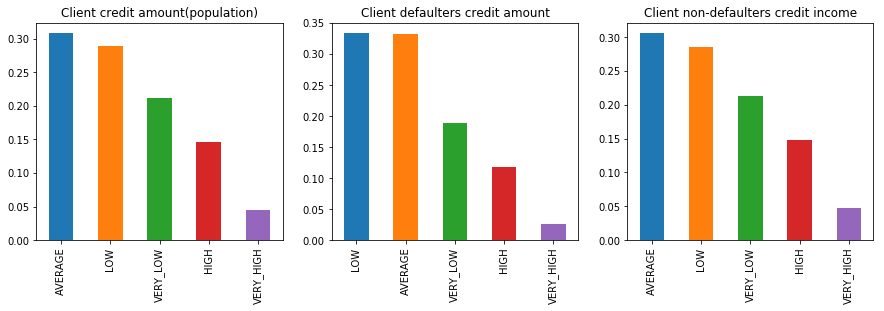

In [455]:
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,3,1)
appl_data['AMT_CREDIT_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client credit amount(population)')
ax2=plt.subplot(1,3,2)
defaulters['AMT_CREDIT_BINS'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client defaulters credit amount')
ax3=plt.subplot(1,3,3)
non_defaulters.AMT_CREDIT_BINS.value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.title('Client non-defaulters credit income')
plt.show()

As we saw before for the case of total income, the upper middle and rich category defaults less comparitively . Here again the 
people who has bought maximum loan credit i.,e who falls in the category of High and Very_High tends to default less . Let us 
analyse whether rich and super rich category people have availed these high value credits in the next phase

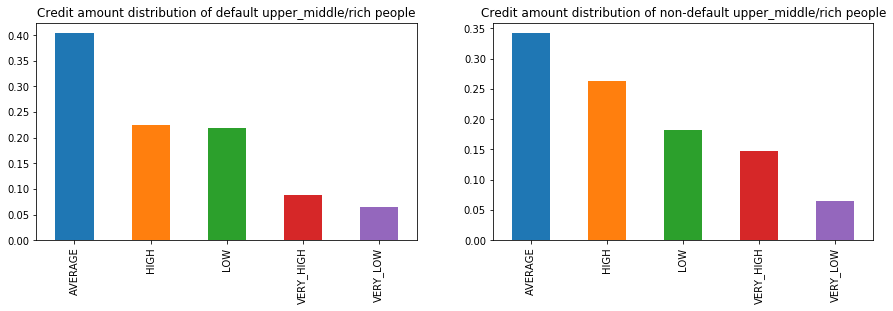

In [456]:
##Observing whether the people with rich and super_rich category has availed maximum high volume credit loan
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters[defaulters['AMT_INCOME_TOTAL_BINS'].isin(['Upper_Middle','Rich_class'])].AMT_CREDIT_BINS.value_counts(normalize=True).plot.bar()
plt.title('Credit amount distribution of default upper_middle/rich people')
ax2=plt.subplot(1,2,2)
non_defaulters[non_defaulters['AMT_INCOME_TOTAL_BINS'].isin(['Upper_Middle','Rich_class'])].AMT_CREDIT_BINS.value_counts(normalize=True).plot.bar()
plt.title('Credit amount distribution of non-default upper_middle/rich people')
plt.show()

From the above inference we can claim the following

In the subset of rich/super rich class, we can infer that the people who has high,very high credit amount 
tend to default less than others

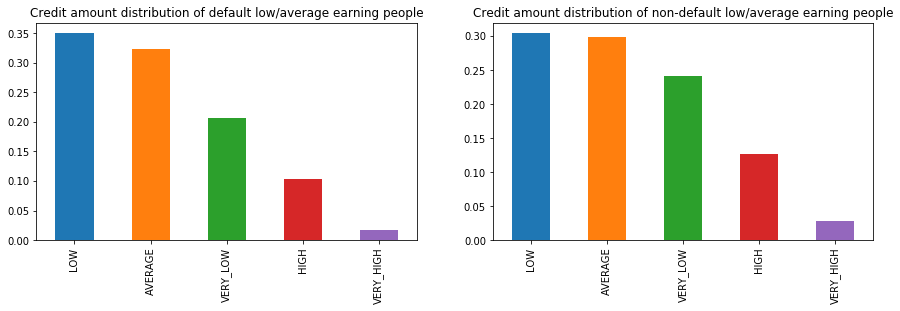

In [457]:
#Let us understand this pattern for low and average earning people
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
defaulters[defaulters['AMT_INCOME_TOTAL_BINS'].isin(['Very_low_class','Low_class','Middle_class'])].AMT_CREDIT_BINS.value_counts(normalize=True).plot.bar()
plt.title('Credit amount distribution of default low/average earning people')
ax2=plt.subplot(1,2,2)
non_defaulters[non_defaulters['AMT_INCOME_TOTAL_BINS'].isin(['Very_low_class','Low_class','Middle_class'])].AMT_CREDIT_BINS.value_counts(normalize=True).plot.bar()
plt.title('Credit amount distribution of non-default low/average earning people')
plt.show()

On close observation we can note that

1. Majority of low income people are able to re-pay the loan which has the "very_low" category that might be this loan amount 
   will be payable based on their income
    
2. Also there is an exception case where there is a slight peak in credit amount being "High" in non-default case even though the 
   class of people earn less . Let us investigate this in detail

# BI-VARIATE ANALYSIS

Analysis of how Annual income and Credit annual amount is related based on TARGET

Text(0.5,1,'Top ten default cases with respect to income-credit amount')

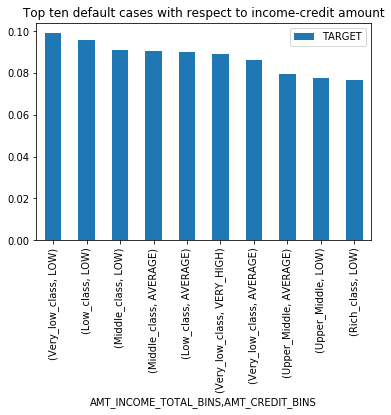

In [458]:
#appl_data[appl_data['AMT_INCOME_TOTAL_BINS'].isin(['AVERAGE','LOW','VERY_LOW'])]
appl_data.groupby(['AMT_INCOME_TOTAL_BINS','AMT_CREDIT_BINS']).agg({'TARGET':'mean'}).sort_values(by='TARGET',ascending=False).iloc[:10].plot.bar()
plt.title('Top ten default cases with respect to income-credit amount')



While taking the top-ten defaulted case of annual amount with respect to annual credit amount we find the below pairs tend to default more:

1. People with Average_income , low and very_low income has a high default rate ( note we summed so that 1 will be added which
   accumulates the total defaulted cases)

2. There are also some rich and upper_middle class people defaulted for the credit loan which is less than their salary. However this is on a small scale.

3. Parallely there is also an evident that people with less salary has high defaults if provided with more credit loan amount as justified by the point 1.
   

We can write a generic function to understand how numeric variables are related to each other and we shall concentrate 
on defaulters alone

In [459]:
def bi_variate(inp1,inp2):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,5))
    sns.scatterplot(x=inp1, y=inp2,data=defaulters,ax=ax1)
    ax1.set_xlabel(inp1)    
    ax1.set_ylabel(inp2)
    ax1.set_title(f'{inp1} vs {inp2} for Non-Defaulters',fontsize=20)
    sns.scatterplot(x=inp1, y=inp2,data=non_defaulters,ax=ax2)
    ax2.set_xlabel(inp1)    
    ax2.set_ylabel(inp2)
    ax2.set_title(f'{inp1} vs {inp2} for Defaulters',fontsize=20)
    plt.show()
    


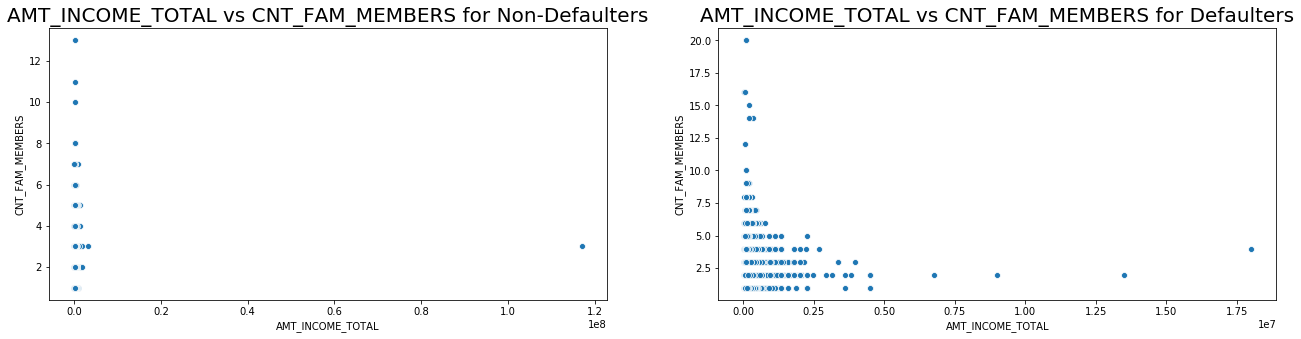

In [460]:
bi_variate('AMT_INCOME_TOTAL','CNT_FAM_MEMBERS')

We can infer that the person with minimum annual income and family count upto 5 tends to default more as the higer concentration 
is on lower left

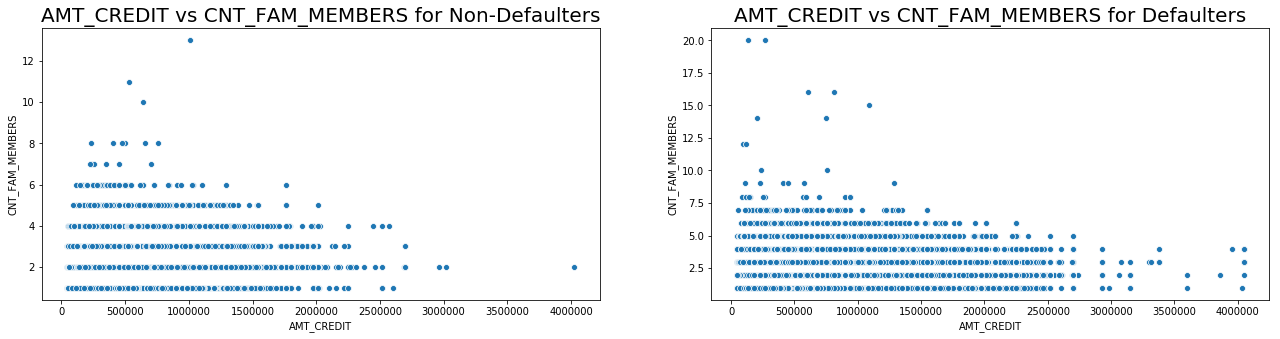

In [461]:
##Credit amount vs family count on the defaulters

bi_variate('AMT_CREDIT','CNT_FAM_MEMBERS')

For the defaulter cases again the lower left portion is denser than others so the family count of utmost 7 tend to default more on the lower credit value . However people with higher credit value defaults less as the family sise grows. May be their family memebers might contribute to the loan payment

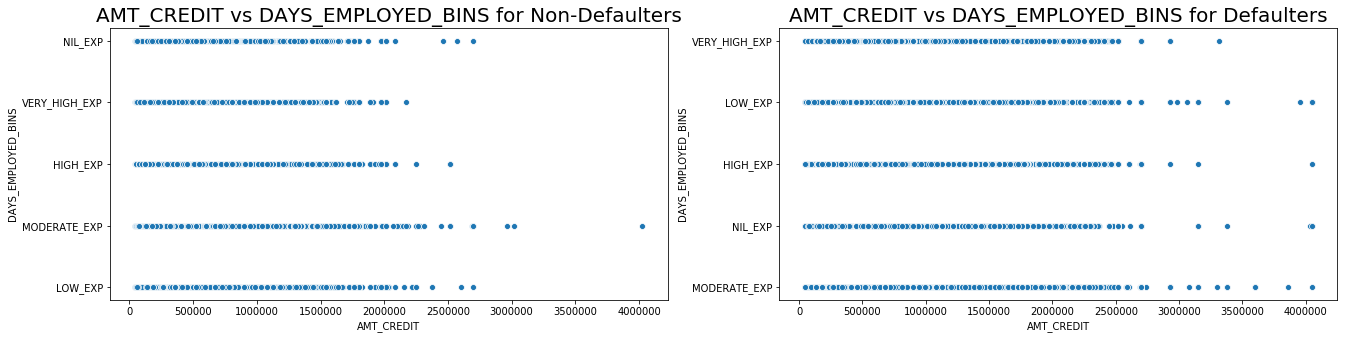

In [462]:
bi_variate('AMT_CREDIT','DAYS_EMPLOYED_BINS')

From close observation it is evident that the people with high experience and very_high experience in the field defaults less than other classes 

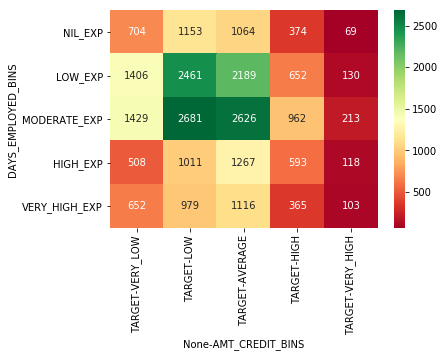

In [463]:
res=pd.pivot_table(data=defaulters,index='DAYS_EMPLOYED_BINS',columns='AMT_CREDIT_BINS',aggfunc={'TARGET':np.sum})
sns.heatmap(res,annot=True,cmap='RdYlGn',fmt='d')
plt.show()

1. If we observe from both the plots scatter and heatmap it is evident that people who are having nil or low experience in work
   tend to default more provided with the credit loan amount.
   
2. However people with high and very high experience do not default much for the credit amount they are alloted with 

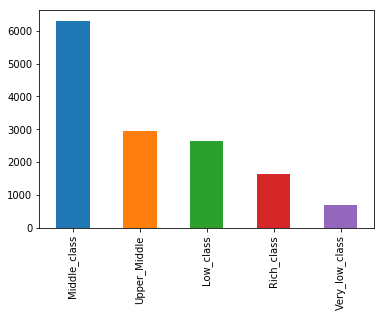

In [464]:
# Let us understand whether the nil and low experience people have higher family count 

a=non_defaulters[non_defaulters['DAYS_EMPLOYED_BINS'].isin(['NIL_EXP','LOW_EXP'])&non_defaulters['AMT_CREDIT_BINS'].isin(['HIGH','VERY_HIGH'])]
a['AMT_INCOME_TOTAL_BINS'].value_counts().plot.bar()
plt.show()

We concentrated only on the classes of nil and low experience people to understand how few of them are able to re-pay the loan,from the above plot we cna conclude that the

1. People who have minumum experience moslty have come from upper_middle and middle class . Also note that the proportion of 
   very_low class is less , so we get some non-default case here . So when considering the work experience it is also 
   equally important to know about their income status before sanctioning the loan amount
  

# Correlation factor of defaulters

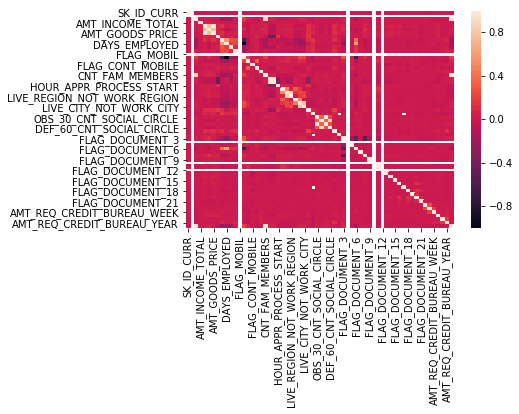

In [465]:
sns.heatmap(defaulters.corr())

To get the top - 10 correlation factor it will be cumbersome to get the insight from the heatmap as we have more than 20 columns.So we used the below method. 

Steps followed to calculate the top-10 correlation feature:

1. We first get the correlation of all columns with itself if the column is numerical then the correlation is derived else pandas automatically imputes NaN

2. Also we know that the self-column or diagonal elements have correlation 1 but we are not intersted in them , we wanted to derive the cross-column correlation whose value is arranged in descending order.

3. The function triu will be returing only the upper diagonal matrix and then using astype it converts the matrix value to boolean 

4. The matrix then conatins 1-D by unstacking and we get the top-10 most correlated values (diagonals neglected)



In [466]:
defaulters_corr = defaulters.corr()
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null by condiioning the matrix value to boolean
corr_matrix = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
corr_matrix=corr_matrix.unstack().reset_index()
corr_matrix.columns=['Column 1','Column 2','Correlation']
corr_matrix=corr_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
corr_matrix

,Column 1,Column 2,Correlation
2014,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
376,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
3800,Total_Family_Count,CNT_FAM_MEMBERS,0.977276
3784,Total_Family_Count,CNT_CHILDREN,0.963858
1259,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
1118,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
2077,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
1511,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
1700,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
377,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295


Observe that we have a redundancy between "Total_Family_Count" and it is repeated twice , this is because in our initial analysis we used total children count+total family members=total family count . So clearly "Total_Family_Count" is the linear combination of "CNT_FAM_MEMBERS" and "CNT_CHILDREN" which does not give any proper insight . So we remove the "Total_Family_Count" as of now for the defaulters and non-defaulter cases and re-use the correlation function

In [467]:
defaulters.drop('Total_Family_Count',axis=1,inplace=True)
non_defaulters.drop('Total_Family_Count',axis=1,inplace=True)

In [468]:
defaulters_corr = defaulters.corr()
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null and unstack makes the matrix to 1-D also we remove the index
corr_matrix = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
corr_matrix=corr_matrix.unstack().reset_index()
corr_matrix.columns=['Column 1','Column 2','Correlation']
corr_matrix=corr_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
corr_matrix

,Column 1,Column 2,Correlation
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
370,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
309,AMT_ANNUITY,AMT_CREDIT,0.752195
2388,FLAG_DOCUMENT_6,DAYS_EMPLOYED,0.617646


In [469]:
previous_appl=pd.read_csv('previous_application.csv')

In [470]:
previous_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
##Dimension and inspecting the dtypes

print('The shape of the dataframe :',previous_appl.shape,'\n')
print('The dtypes are:','\n',previous_appl.dtypes.value_counts())

The shape of the dataframe : (1670214, 37) 

The dtypes are: 
 object     16
float64    15
int64       6
dtype: int64


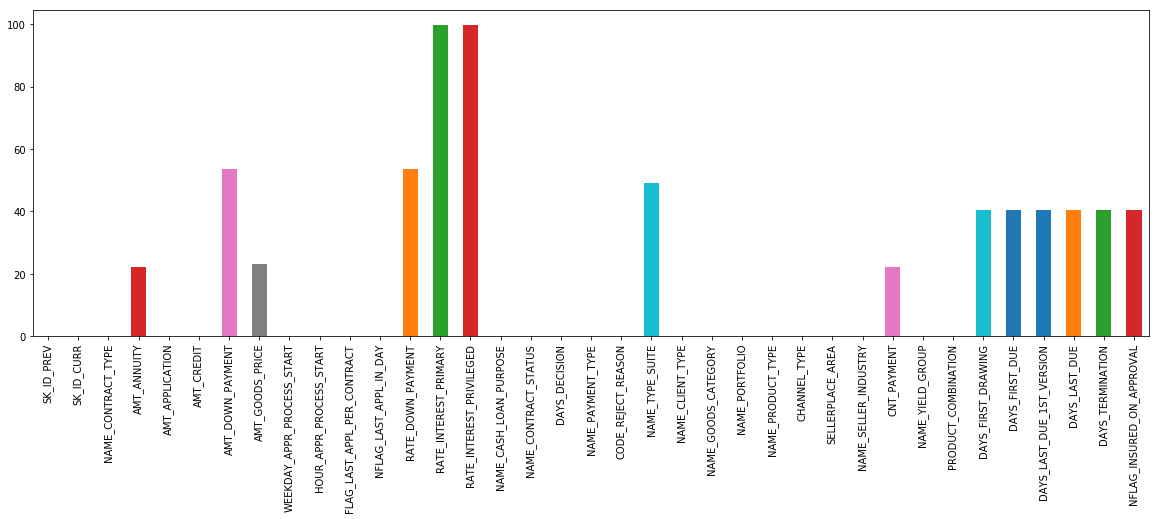

In [472]:
#Inspecting the null percentage in this data frame
plt.figure(figsize=[20,6])
((previous_appl.isnull().mean())*100).plot.bar()
plt.show()

We can either drop the null valued columns who mean is greater than 40 else we can retain but not use it for further analysis. Let us drop the columns which contribute to >30 mean null values

In [473]:
remove_columns=previous_appl.loc[:,((previous_appl.isnull().mean())*100)>=40]
remove_columns.columns

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [474]:
#Removing those columns alone
print('Old column size',previous_appl.shape[1])
previous_appl.drop(columns=remove_columns,inplace=True)
print("New column size",previous_appl.shape[1])

Old column size 37
New column size 26


In [475]:
previous_appl.columns.sort_values(ascending=True)

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CHANNEL_TYPE', 'CNT_PAYMENT', 'CODE_REJECT_REASON', 'DAYS_DECISION',
       'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS',
       'NAME_CONTRACT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'NFLAG_LAST_APPL_IN_DAY', 'PRODUCT_COMBINATION',
       'SELLERPLACE_AREA', 'SK_ID_CURR', 'SK_ID_PREV',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [476]:
# XNA and XAP are replaced by NaN
previous_appl=previous_appl.replace('XNA', np.NaN)
previous_appl=previous_appl.replace('XAP', np.NaN)

# Univariate Analysis

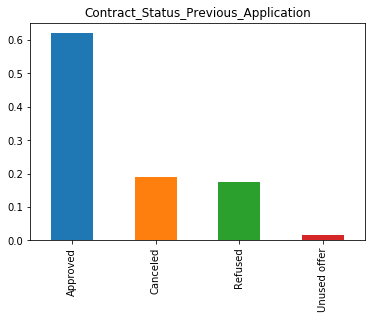

In [477]:
#Knowing about the Contract_status

previous_appl.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.title('Contract_Status_Previous_Application')
plt.show()

More than 60% of loan has been approved in the previous application followed by cancelled and refused

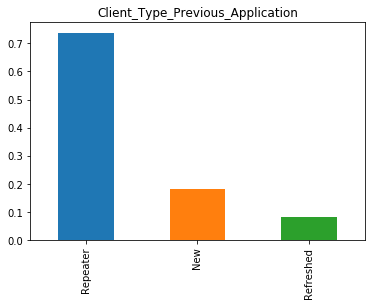

In [478]:
#Analysing about the client type
previous_appl.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Client_Type_Previous_Application')
plt.show()

Over more than 70% of people are repeaters while availing the loan followed by New people

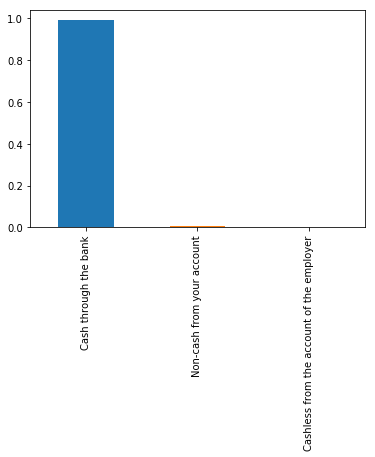

In [479]:
#NAME_PAYMENT_TYPE
previous_appl.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

Over more than 90% of loan payment was done through the cash of the same bank 

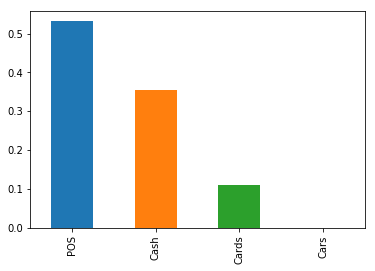

In [480]:
#Analysing the NAME_PORTFOLIO column
previous_appl.NAME_PORTFOLIO.value_counts(normalize=True).plot.bar()
plt.show()

Over 55% loan application happened through Point of Sales and the rest is of cash type

# Finding the top-ten correltion factors in Previous application

In [481]:
previous_appl_corr = previous_appl.corr()
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null by condiioning the matrix value to boolean
upper_matrix = previous_appl_corr.where(np.triu(np.ones(previous_appl_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
upper_matrix=upper_matrix.unstack().reset_index()
upper_matrix.columns=['Column 1','Column 2','Correlation']
upper_matrix=upper_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
upper_matrix

,Column 1,Column 2,Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884
59,AMT_GOODS_PRICE,AMT_CREDIT,0.993087
47,AMT_CREDIT,AMT_APPLICATION,0.975824
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895
46,AMT_CREDIT,AMT_ANNUITY,0.816429
35,AMT_APPLICATION,AMT_ANNUITY,0.808872
113,CNT_PAYMENT,AMT_APPLICATION,0.680630
114,CNT_PAYMENT,AMT_CREDIT,0.674278
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129
112,CNT_PAYMENT,AMT_ANNUITY,0.394535


In [482]:
#Merging two dataframes using left join also note that we are interested only in target variable of application data

bank_credit_details = pd.merge(previous_appl, appl_data, how='inner', on=['SK_ID_CURR'])


In [483]:
bank_credit_details.shape

(1413701, 102)

# Bivariate Analysis of merged dataset

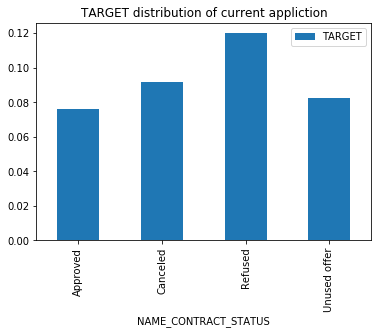

In [484]:
##Analysing effect of NAME_CONTRACT_STATUS of previous application vs Target variable
bank_credit_details[['NAME_CONTRACT_STATUS', 'TARGET']].groupby(['NAME_CONTRACT_STATUS']).mean().plot.bar()
plt.title('TARGET distribution of current appliction')
plt.show()

We could see that the previous application which is rejected results in higher percentage of default in the current
application

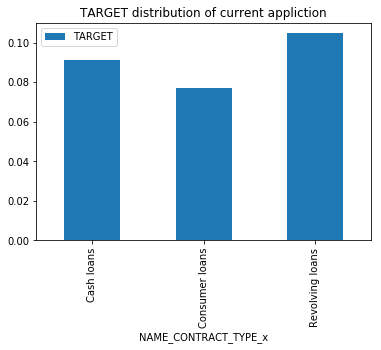

In [485]:
#Type of loans issued in previous application and target variable
bank_credit_details[['NAME_CONTRACT_TYPE_x', 'TARGET']].groupby(['NAME_CONTRACT_TYPE_x']).mean().plot.bar()
plt.title('TARGET distribution of current appliction')
plt.show()


We can conclude the following:

    1. From the application data we could find that the majority of people opted for cash loans.
    2. In the previous application data the people who opted Revolving loans tend to default more followed
       by cash loans 
    3. In the previous application data the people who opted Consumer loans defaulted less.


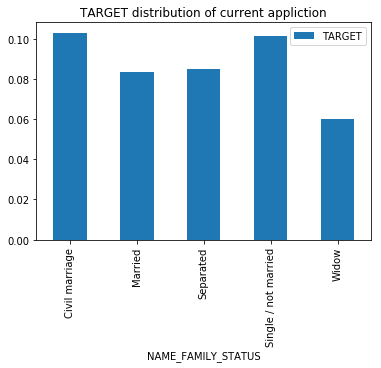

In [486]:
#Plotting how family status effect on target variable
bank_credit_details[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS']).mean().plot.bar()
plt.title('TARGET distribution of current appliction')
plt.show()

As we saw before in our analysis people who are civil married and single/not married tend to default more than others

Let us perform a couple of multivariate analysis now with the combined dataframe of prevous application and current application data

# Multivariate analysis

We can find the following interesting observation with respect to 'NAME_CONTRACT_STATUS'
    1.Gender type vs NAME_CONTRACT_STATUS on target
    2.Occupation type vs NAME_CONTRACT_STATUS on target
    3.NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS on target
    4.NAME_FAMILY_STATUS vs NAME_CONTRACT_STATUS on target

In [487]:
def pivot_table(Var_1,Var_2):
    table=pd.pivot_table(bank_credit_details, values='TARGET', index=[Var_1],columns=[Var_2], aggfunc=np.mean)
    ax = table.T.plot(kind='bar')
    ylab = ax.set_ylabel('% of Loan-Payment Difficulties')
    plt.title(f'{Var_1} vs {Var_2} on TARGET', fontdict={'fontsize':20})
    plt.legend(bbox_to_anchor=(1.15, 1))
    plt.show()

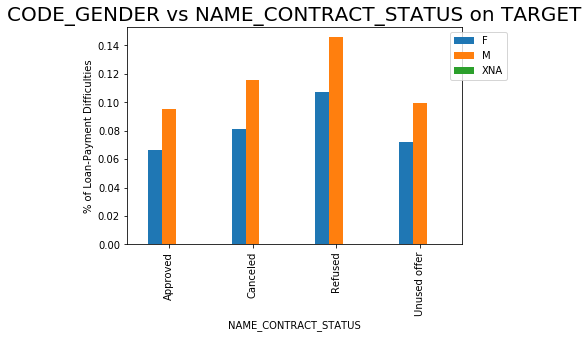

In [488]:
pivot_table('CODE_GENDER','NAME_CONTRACT_STATUS')

As we saw in our plot before that for the given proportion males tend to default more than the female counterpart. Also here we could conclude the following.

Males for which the application is refused/cancelled previously has higher default rate than the females 




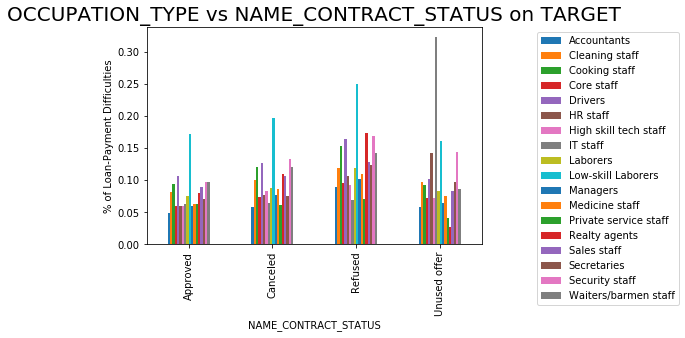

In [489]:
pivot_table('OCCUPATION_TYPE','NAME_CONTRACT_STATUS')

Quickly we can spot that the from other occupation types the loan sanction which got cancelled or refused previously for the 'low skill/laborers'
has the maximum default scenerio

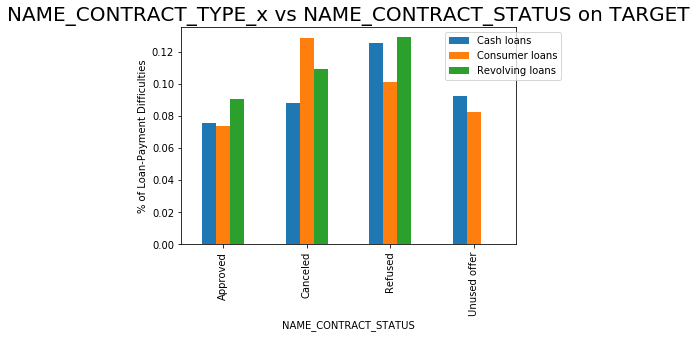

In [490]:
#pivot_table('NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS')

pivot_table('NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS')

People whose Revolving loans got refused in the previous application tend to default more in the current application
and same goes for the case of consumer loan which got cancelled in the previous application

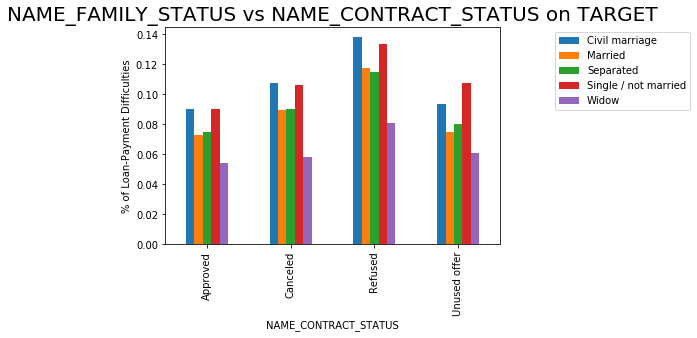

In [491]:
pivot_table('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

Civil maried people whose application is rejected in the previous application has higher default rate than others
Widow people has overall less default rate in comparision to other type of people


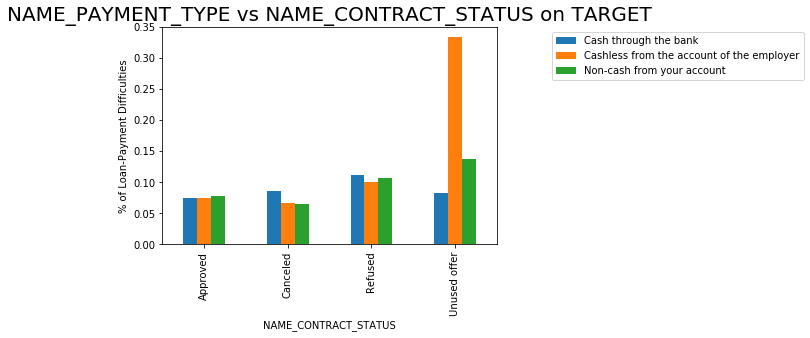

In [492]:
pivot_table('NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS')

Much of the default of over 35% comes from the 'Cashless from the account of the employer' category for whom the loan sactioned was
of unused offer

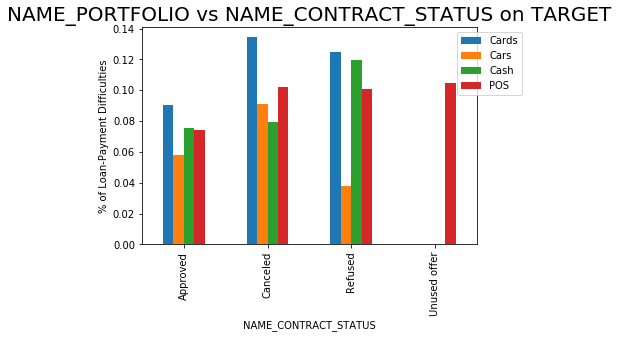

In [493]:
pivot_table('NAME_PORTFOLIO','NAME_CONTRACT_STATUS')

We can conclude that the people whose application is refused provided they opt cash as Portfolio and those whose application is cancelled provided they opted for 'Point of Sales' as Portfolio have more difficulties in re-paying the loan i.,e the proportion of defaulters is more in this case

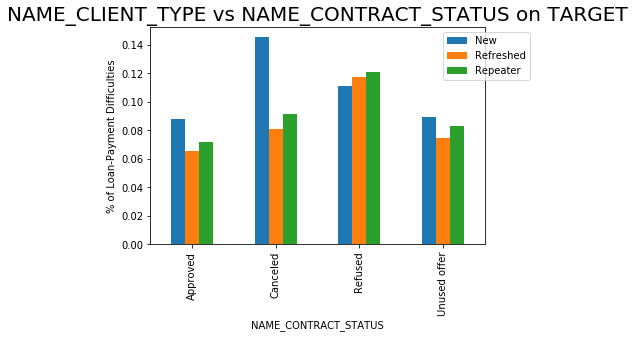

In [494]:
pivot_table('NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS')

New type of people who tends to default more whose loan is not used or cancelled in the previous application 
The refreshed type of user has compaitvely lesser default propertion than others


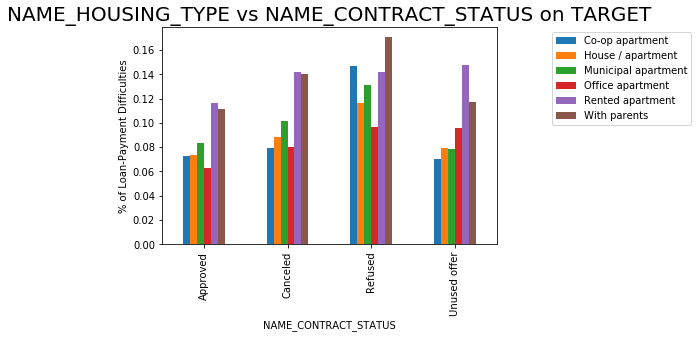

In [495]:
pivot_table('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

People residing in 'Rented Appartments' whose previous application is of unused offer type defaults more than other classes.
In all other categories the people who stay with parents provided their previous application is 'cancelled/refused' tend 
to default more

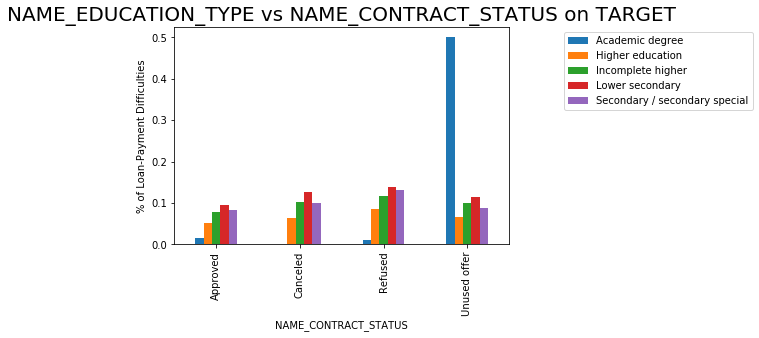

In [496]:
pivot_table('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

People with Academic degree and whose previous application is unused tend to default more.

For the people with lower secondary/incomplete higher education whose previous loans are cancelled/refused default more than the higher education people in all aspects

# Statistical Tests (Optional)

In [497]:
from scipy.stats import kurtosis, skew, stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
import scipy.stats as stats

1.Finding whether there is a significant default in males however the proportion is small:

Stating the null and alternative hypothesis:

H0 - There is an equity in default based on gender
;H1 - Default cases is based on the gender.

In [498]:
Ho = "There is no gender bias in default" # Stating the Null Hypothesis 
Ha = "Default cases is based on the gender" # Stating the Alternate Hypothesis

x = np.array(appl_data[appl_data.CODE_GENDER == 'F'].TARGET)
y = np.array(appl_data[appl_data.CODE_GENDER == 'M'].TARGET)  

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Default cases is based on the gender as the p_value (8.942120639393758e-203) < 0.05


2. Doing similar tests to understand if a person who owns a own flat and car has a dependancy to default

   Stating the null and alternative hypothesis:

    H0 - The person who has own flat will default
    ;H1 - The person who has own flat will not default.

In [499]:
Ho = "The person who has own flat and car will  default" # Stating the Null Hypothesis 
Ha = "The person who has own flat and car will not default" # Stating the Alternate Hypothesis

x = np.array(appl_data[appl_data.FLAG_OWN_REALTY == 'Y'].TARGET)
y = np.array(appl_data[appl_data.FLAG_OWN_CAR == 'Y'].TARGET)  

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


The person who has own flat and car will not default as the p_value (0.0) < 0.05


3. Checking whether the type of loans has anything to do with defaults 

 Stating the null and alternative hypothesis:

    H0 - The loan type has dependancy to default
    H1 - The loan type has not any dependancy to default.

In [500]:
Ho = "The loan type has dependancy to default" # Stating the Null Hypothesis 
Ha = "The loan type has not any dependancy to default" # Stating the Alternate Hypothesis

x = np.array(appl_data[appl_data.NAME_CONTRACT_TYPE == 'Cash loans'].TARGET)
y = np.array(appl_data[appl_data.NAME_CONTRACT_TYPE == 'Revolving loans'].TARGET)  

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

The loan type has not any dependancy to default as the p_value (7.332277969330953e-66) < 0.05


4. Checking if the low region or tier of city contribute to loan default ( Let us take city tier alone )

Stating the null and alternative hypothesis:

H0 - There is a relation between loan default and tier of the low tier city ;H1 - There is no relation between loan default and low city tier.


In [501]:
#For chi-square we need to convert targets to categorical feature
appl_data['TARGET_CAT']=appl_data['TARGET'].apply(lambda x:'YES' if x==1 else 'NO')

Ho = "There is a relation between loan default and tier city" # Stating the Null Hypothesis 
Ha = "There is no relation between loan default and city tier" # Stating the Alternate Hypothesis


crosstab = pd.crosstab(appl_data['REGION_RATING_CLIENT_W_CITY'],appl_data['TARGET_CAT'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

z, p_value  = stests.ztest(x,y,value=0)  #Performing an Independent z-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

There is no relation between loan default and city tier as the p_value (7.332277969330953e-66) < 0.05


# Important conclusions based on statistical tests:

1. There is a gender dependancy on the default cases of loan . So however the male proportion is less than females we saw that
   the male tends to default more than females for the given proportion.
    
2. There is no statistical evidance to say that the person who owns a car and flat might default . However as we interpreted 
   earlier person who has own flat has a difficulty in paying loan compared to the own car.
    
3. The loan type has no dependancy on default according to the data we have . However we later investigated with the help of
   previous application data about the loan type cancellation/refusal nature which had on default cases.

4. There is a statistical evidance that there is a relation between city tier and default cases